In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

%matplotlib notebook
#%matplotlib

from tboard import file2number
from vis_utils import split_posneg,get_path
from vis_utils import get_neuron_values
from nonlinearities import sigmoid
from vis_utils import splitL

clist=['g','c','m','y','k','b','r']
listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

In [2]:
#log_dir='./logs/Model_0220_093548_triforce test 4442'
log_dir='./logs/Model_0220_102206_triforce_mac_test'#Good video
#log_dir='./logs/Model_0220_142344_valley'
#log_dir='./logs/Model_0220_144145_R2Clean_covectorinspect'
#log_dir='./logs/Model_0221_101830_R2Clean4442'
#log_dir='./logs/Model_0221_123649_Valley7772'
#log_dir='./logs/Model_0221_125407_R2Clean7772'
#log_dir='./logs/Model_0221_140626_R2Clean7772'
#log_dir='./logs/Model_0221_145026_trforce44422'#0.88acc
#log_dir='./logs/Model_0221_151433_trforce7772_positiveweights'
record_dir=os.path.join(log_dir,'records')

In [209]:
id_str=str(file2number(log_dir))

W1=np.load(get_path('W1','wwatch',log_dir))
W2=np.load(get_path('W2','wwatch',log_dir))
W3=np.load(get_path('W3','wwatch',log_dir))
W4=np.load(get_path('W4','wwatch',log_dir))

b1=np.load(get_path('b1','wwatch',log_dir))
b2=np.load(get_path('b2','wwatch',log_dir))
b3=np.load(get_path('b3','wwatch',log_dir))
b4=np.load(get_path('b4','wwatch',log_dir))

W1f,W2f,W3f,W4f=W1[-1],W2[-1],W3[-1],W4[-1]#final weights
b1f,b2f,b3f,b4f=b1[-1],b2[-1],b3[-1],b4[-1]#final weights
delW4f=np.reshape(W4[-1,:,1]-W4[-1,:,0], [-1,1])
delb4f=b4[-1,1]-b4[-1,0]
    
delu=np.load(get_path('delu','wwatch',log_dir))
deluf=delu[-1]
step=np.load(get_path('step','wwatch',log_dir))
gridP=np.load(get_path('Prob','hmwatch',log_dir))
gridX=np.load(get_path('gridX','hmwatch',log_dir))
Pfinal=gridP[-1,:,:,1]

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [210]:
final_weight_dir=os.path.join(record_dir,'final_weights')
if not os.path.exists(final_weight_dir):
    os.makedirs(final_weight_dir)

np.savetxt(final_weight_dir+'/'+id_str+'_W1.txt',W1f)
np.savetxt(final_weight_dir+'/'+id_str+'_W2.txt',W2f)
np.savetxt(final_weight_dir+'/'+id_str+'_W3.txt',W3f)
np.savetxt(final_weight_dir+'/'+id_str+'_delW4.txt',deluf)

<IPython.core.display.Javascript object>


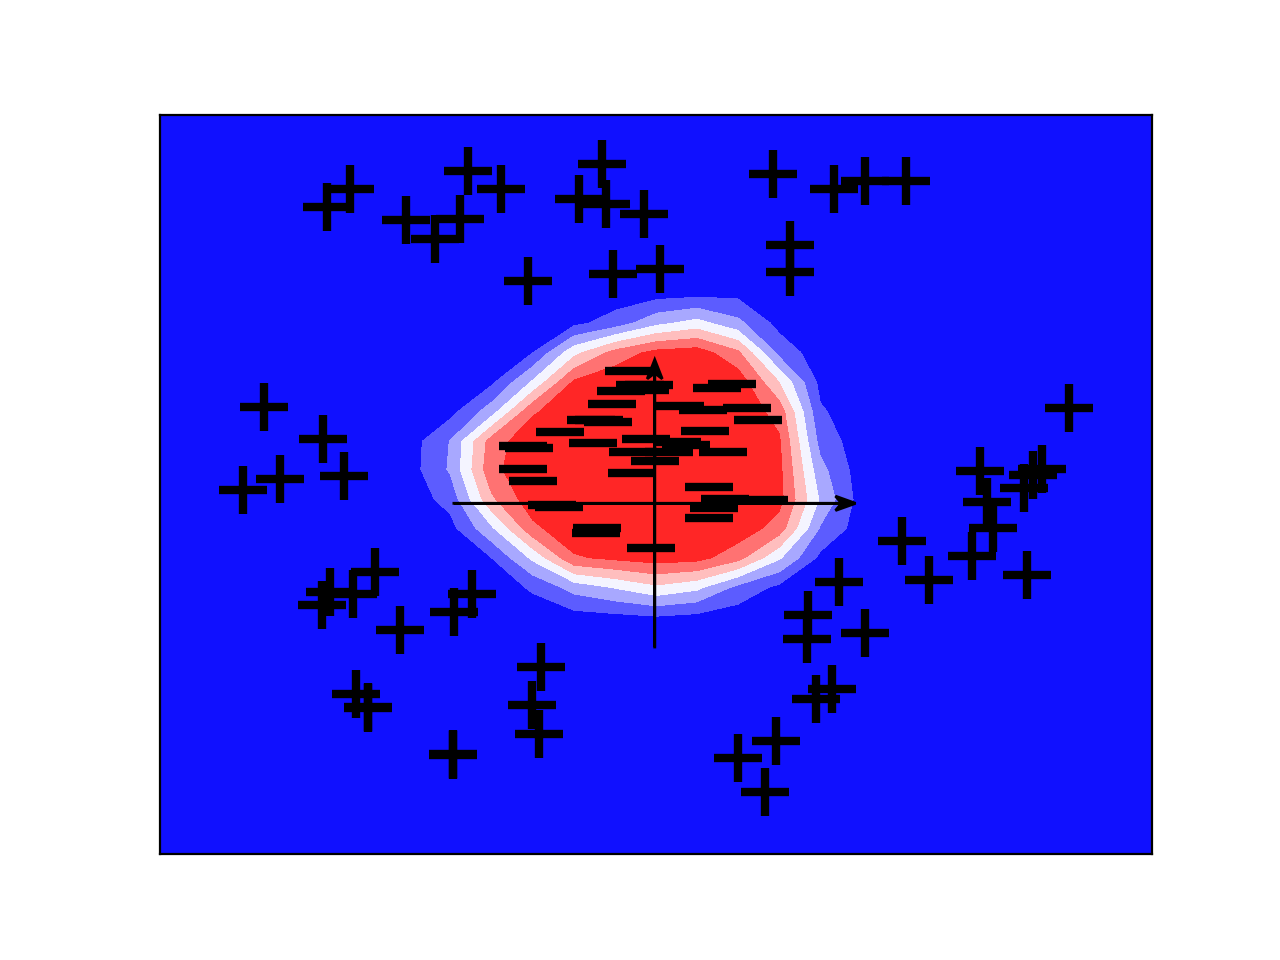

In [198]:
##Can skip cell
fig,ax=plt.subplots()

levels=np.linspace(0,1,11)#c='b',

ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],Pfinal,cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
#plt.tight_layout()

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

xmin=-1.5
xmax=1.5
ymin=-1.5
ymax=1.5
hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 

ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
#plt.savefig(record_dir+'/'+id_str+'_wbarpos_dataclassif.pdf')
#ax.set_aspect('equal')
#ax.grid(True, which='both')
#ax.axhline(y=0, color='k')
#ax.axvline(x=0, color='k')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/'+id_str+'_dataclassif.pdf')

In [186]:
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
plt.savefig(record_dir+'/'+id_str+'_data_scatter.pdf')
plt.show()


In [199]:
record_dir+'/'+id_str+'_data_scatter.pdf'

'./logs/Model_0221_151433_trforce7772_positiveweights/records/221151433_data_scatter.pdf'

In [200]:
#%load_ext autoreload
#%autoreload 2

In [211]:
##Better gridX
###Heatmap Boundaries###Probably move this sw else later                                                                                                                                        
#size=self.npX.max(axis=0)-self.npX.min(axis=0)
#lower=self.npX.min(axis=0)-0.1*size
#upper=self.npX.max(axis=0)+0.1*size

lower=gridX.reshape([-1,2]).min(axis=0)
upper=gridX.reshape([-1,2]).max(axis=0)
sz=upper-lower
delta=0.005*np.min(sz)
x1=np.arange(lower[0],upper[0],delta)#assuming 2D data
x2=np.arange(lower[1],upper[1],delta)
GridX=np.stack(np.meshgrid(x1,x2),axis=-1)#LxLx2
#gX=np.reshape(gridX,[-1,2])#assuming 2D data
#self.gX=gX #debug


### This cell picks a single layer and focuses on that. next one will do 2x2 fold

In [145]:
###ANIMATION###


#fig,ax=plt.subplots(figsize=(14,12))
#fig,axes=plt.subplots(2,2)
fig,ax=plt.subplots()
#gX0,gX1=gridX[:,:,0],gridX[:,:,1]
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX

layer=3

def draw(time,layer,ax=ax):
    contour_list=[]
    l=layer
    
    delW4=np.reshape(W4[:,:,1]-W4[:,:,0], W4.shape[:2])
    delb4=b4[:,1]-b4[:,0]
    time_weight_list=[[W1[time],b1[time]],
                   [W2[time]   ,b2[time]],
                   [W3[time]   ,b3[time]],
                   [delW4[time],delb4[time]] ]
    
    P_Layers=get_neuron_values(gX,time_weight_list)
    #P_Layers=get_neuron_values(gridX,time_weight_list)
    #Precon=sigmoid(P_Layers[-1][:,:,1]-P_Layers[-1][:,:,0])
    
    if len(P_Layers[l].shape)==2:#only one neuron in layer
        listL=[P_Layers[l]]
    else:
        listL=splitL(P_Layers[l])
    
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.])#err thrown
        contour_list.append(ctf)
    return contour_list

#for l in 
contour_list=draw(0,layer,ax)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

#for l in range(len(P_Layers)-1):
#    listL=splitL(P_Layers[l])
#    for i,Pneu in enumerate(listL):
#        ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.],linestyles=listLineStyle[l])

#plt.tight_layout()

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

def animate(time):
    global contour_list
    for ctf in contour_list:
        for c in ctf.collections:
            c.remove()
    contour_list=draw(time,layer)
    #ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
    #                cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    #ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    #ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return contour_list
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
del_t=1
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

<IPython.core.display.Javascript object>

TypeError: Shape of x does not match that of z: found (200, 209) instead of (24, 25).

In [72]:
fps=25
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=fps)
anim_deep.save(record_dir+'/'+id_str+'_layer'+str(layer)+'_fps'+str(fps)+'.mp4', writer=writer)

In [35]:
%matplotlib notebook

<IPython.core.display.Javascript object>


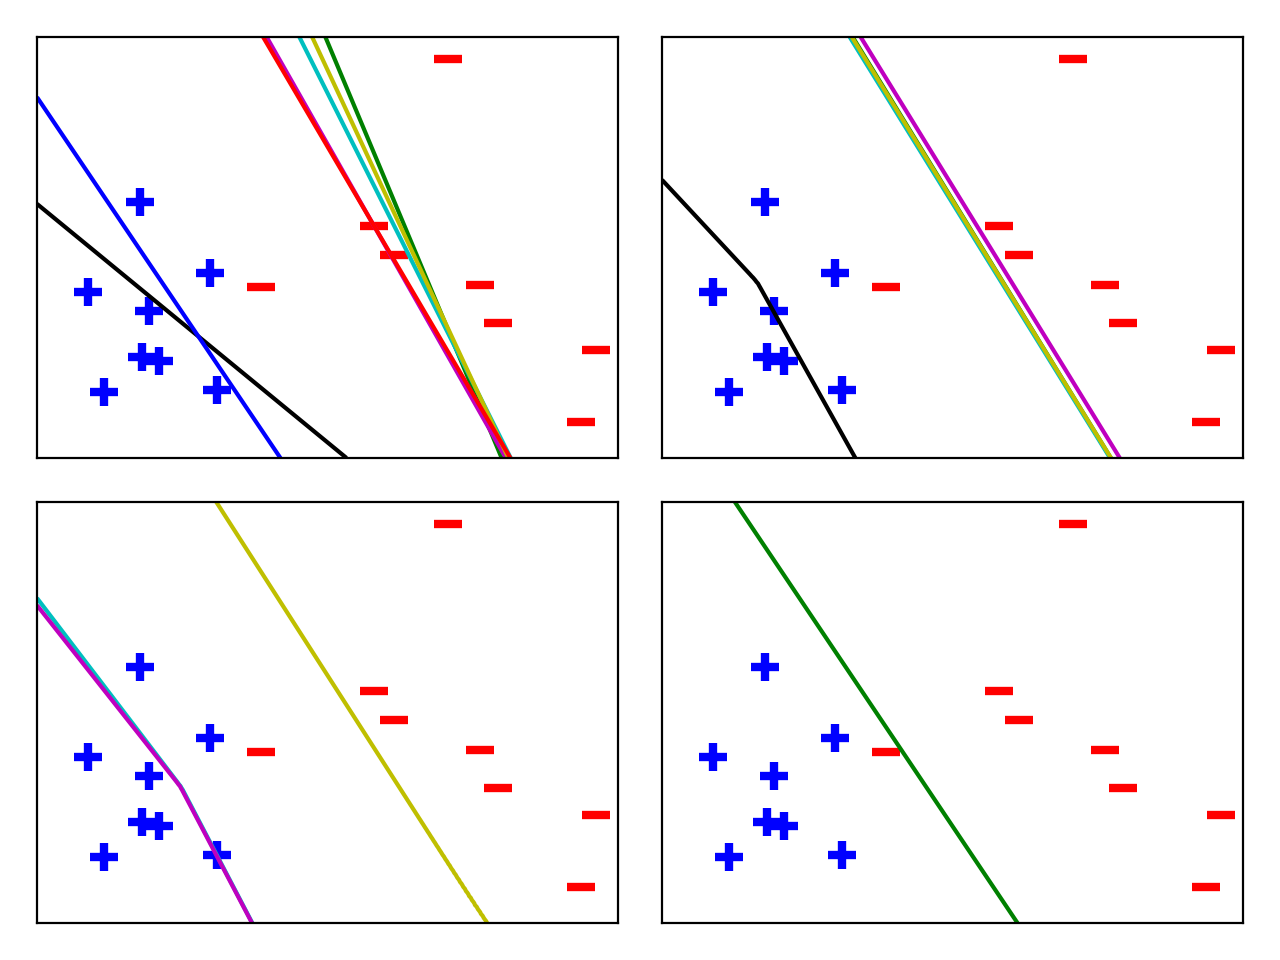

In [157]:
###ANIMATION###
###This cell animates all layers simultaneously in 2x2 fold

#fig,ax=plt.subplots(figsize=(14,12))
fig,axes=plt.subplots(2,2)
#fig,ax=plt.subplots()

#gX0,gX1=gridX[:,:,0],gridX[:,:,1]
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX

faxes=axes.flatten()
#layer=3

def draw(time,layer,ax):
    contour_list=[]
    l=layer
    
    delW4=np.reshape(W4[:,:,1]-W4[:,:,0], W4.shape[:2])
    delb4=b4[:,1]-b4[:,0]
    time_weight_list=[[W1[time],b1[time]],
                   [W2[time]   ,b2[time]],
                   [W3[time]   ,b3[time]],
                   [delW4[time],delb4[time]] ]
    
    P_Layers=get_neuron_values(gX,time_weight_list)
    #Precon=sigmoid(P_Layers[-1][:,:,1]-P_Layers[-1][:,:,0])
    
    if len(P_Layers[l].shape)==2:#only one neuron in layer
        listL=[P_Layers[l]]
    else:
        listL=splitL(P_Layers[l])
    
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.])
        contour_list.append(ctf)
    return contour_list

CT_lists=[]
for l in range(4):#4 layers
    contour_list=draw(0,l,faxes[l])
    CT_lists.append(contour_list)
for ax in faxes:
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')
    ax.set_xticks([]) # labels 
    ax.set_yticks([])

    #plt.xticks([]) # labels 
    #plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')


plt.tight_layout()

def animate(time):
    global CT_lists
    for contour_list in CT_lists:
        for ctf in contour_list:
            for c in ctf.collections:
                c.remove()
    CT_lists=[]
    for l in range(4):#4 layers
        CT_lists.append(draw(time,l,faxes[l]))
    return CT_lists

#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
del_t=1
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

In [158]:
fps=25
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=fps)
anim_deep.save(record_dir+'/'+id_str+'_subplots_feb22'+str(fps)+'.mp4', writer=writer)

<IPython.core.display.Javascript object>


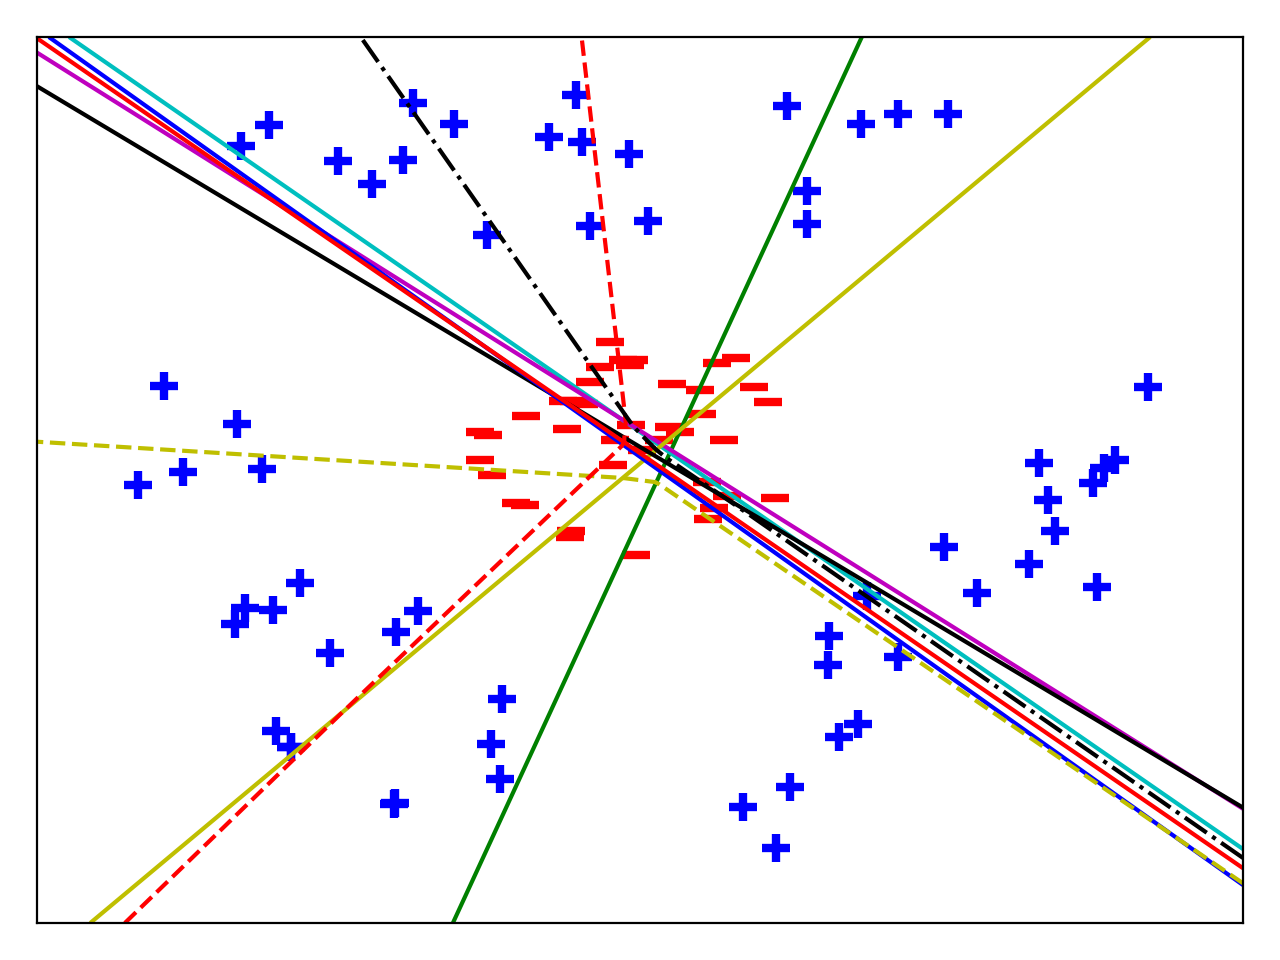

In [206]:
###ANIMATION###
###This animation draws an overlay of all the neuron zeros

#fig,ax=plt.subplots(figsize=(14,12))
#fig,axes=plt.subplots(2,2)
fig,ax=plt.subplots()
#gX0,gX1=gridX[:,:,0],gridX[:,:,1]
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX

#layer=3
#listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']
def draw(time,layer,ax=ax):
    contour_list=[]
    l=layer
    
    delW4=np.reshape(W4[:,:,1]-W4[:,:,0], W4.shape[:2])
    delb4=b4[:,1]-b4[:,0]
    time_weight_list=[[W1[time],b1[time]],
                   [W2[time]   ,b2[time]],
                   [W3[time]   ,b3[time]],
                   [delW4[time],delb4[time]] ]
    
    P_Layers=get_neuron_values(gX,time_weight_list)
    #Precon=sigmoid(P_Layers[-1][:,:,1]-P_Layers[-1][:,:,0])
    
    if len(P_Layers[l].shape)==2:#only one neuron in layer
        listL=[P_Layers[l]]
    else:
        listL=splitL(P_Layers[l])
    
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.],linestyles=listLineStyle[l])
        contour_list.append(ctf)
    return contour_list

CT_lists=[]
for l in range(4):#4 layers
    contour_list=draw(0,l,ax)
    CT_lists.append(contour_list)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

plt.tight_layout()


def animate(time):
    global CT_lists
    for contour_list in CT_lists:
        for ctf in contour_list:
            for c in ctf.collections:
                c.remove()
    CT_lists=[]
    for l in range(4):#4 layers
        CT_lists.append(draw(time,l,ax))
    return CT_lists


#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
del_t=1
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)


In [207]:
fps=25
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=fps)
anim_deep.save(record_dir+'/'+id_str+'_overlay_feb22'+'_fps'+str(fps)+'.mp4', writer=writer)

In [212]:
#for 
print log_dir

./logs/Model_0220_102206_triforce_mac_test


In [213]:
s=100.
pretty=lambda y:np.round(s*y)/s
print 'W1',pretty(W1f)
print 'b1',pretty(b1f)
print 'W2',pretty(W2f)
print 'b2',pretty(b2f)
print 'W3',pretty(W3f)
print 'b3',pretty(b3f)
print 'W4',pretty(delW4f)
print 'b4',pretty(delb4f)

W1 [[-0.93 -0.06 -0.88  1.02]
 [-0.58  1.31 -0.64 -0.82]]
b1 [-0.17 -0.69  0.01  0.34]
W2 [[-0.03  0.68  0.76  0.74]
 [-0.01  0.07  1.4   0.93]
 [ 0.02  0.63  0.79  0.73]
 [-0.01  0.95  1.    0.91]]
b2 [-0.01 -0.76 -0.98  0.59]
W3 [[-0.02  0.   -0.01 -0.  ]
 [ 0.81 -1.   -1.12 -0.01]
 [ 0.96 -1.63 -1.64 -0.04]
 [ 0.94  1.11  1.14 -0.06]]
b3 [-0.55  0.86  0.92  0.  ]
W4 [[ 1.88]
 [-2.08]
 [-2.16]
 [ 0.1 ]]
b4 -0.99


In [230]:
c2=W2f[:,1];m2=W2f[:,2]

In [214]:
clist

['g', 'c', 'm', 'y', 'k', 'b', 'r']

In [234]:
c2/np.abs(b2f[1])

array([0.8974202 , 0.09376629, 0.8303604 , 1.2618678 ], dtype=float32)

In [248]:
M1=np.vstack([W1f,b1f,np.ones_like(b1f)])
M2=np.vstack([W1f,b2f])

In [282]:
i1=[0,2,3]
i2=[1,2]

sW1=W1f[:,i1]
sW2=W2f[i1][:,i2]
T=[np.dot(sW1,sW2), np.dot(b1f[i1],sW2)+b2f[i2] ]

sW3=W3f[i2,:] #say all sW3 is on
np.linalg.multi_dot([sW1,sW2,sW3,delW4f])

array([[ -4.553294],
       [-24.905449]], dtype=float32)

In [283]:
B1=np.linalg.multi_dot([b1f[i1],sW2,sW3,delW4f])
B2=np.linalg.multi_dot([b2f[i2],sW3,delW4f])
B3=np.linalg.multi_dot([b3f,delW4f])+b4f
B=B1+B2+B3
print B

[-14.211065 -15.201368]


In [284]:
i1=[1]
i2=[2]

sW1=W1f[:,i1]
sW2=W2f[i1][:,i2]
sW3=W3f[i2,:] #say all sW3 is on
np.linalg.multi_dot([sW1,sW2,sW3,delW4f])

array([[-0.7252909],
       [15.922363 ]], dtype=float32)

In [285]:
B1=np.linalg.multi_dot([b1f[i1],sW2,sW3,delW4f])
B2=np.linalg.multi_dot([b2f[i2],sW3,delW4f])
B3=np.linalg.multi_dot([b3f,delW4f])+b4f
B=B1+B2+B3
print B

[-21.291    -22.281303]


In [269]:
delW4f.shape

(4, 1)

In [266]:
np.dot(b1f[i1],sW2)

array([0.2147184 , 0.22049987], dtype=float32)

In [262]:
W2f[np.array(i1)][:,np.array(i2)]

array([[0.6777496 , 0.75696284],
       [0.6271047 , 0.7948143 ],
       [0.9529876 , 1.0049193 ]], dtype=float32)

In [251]:
M1.shape

(4, 4)

In [250]:
M2.shape

(3, 4)

In [247]:
M1

array([[-0.93179595, -0.0594551 , -0.87588245,  1.0187992 ],
       [-0.5755128 ,  1.3052222 , -0.64431506, -0.81974924],
       [-0.17278536, -0.6888848 ,  0.01037995,  0.34136257],
       [ 1.        ,  1.        ,  1.        ,  1.        ]],
      dtype=float32)

In [244]:
b1f.reshape([1,-1])

array([[-0.17278536, -0.6888848 ,  0.01037995,  0.34136257]],
      dtype=float32)

In [245]:
np.dot(b1f,W2f)

array([ 0.00934013,  0.1659356 , -0.7434284 , -0.445511  ], dtype=float32)

In [240]:
np.dot(M1,c2)

array([-0.21410161, -1.4828892 ,  0.16593558], dtype=float32)

In [241]:
np.dot(M1,m2)

array([-0.46088088,  0.05480957, -0.74342835], dtype=float32)

In [242]:
np.dot(M1,c2)+np.dot(M1,m2)

array([-0.6749825, -1.4280796, -0.5774928], dtype=float32)

In [239]:
np.dot(M1,W2f)

array([[ 7.4406862e-03, -2.1410158e-01, -4.6088091e-01, -4.5088834e-01],
       [-2.5921006e-04, -1.4828892e+00,  5.4809477e-02, -4.3541205e-01],
       [ 9.3401289e-03,  1.6593561e-01, -7.4342841e-01, -4.4551101e-01]],
      dtype=float32)

In [233]:
m2/np.abs(b2f[2])

array([0.7702566, 1.4238329, 0.8087728, 1.0225676], dtype=float32)

In [218]:
from numpy.linalg import norm
print norm(W2f[[0,2,3],1]),b2f[1]
print norm(W2f[[0,2,3],2]),b2f[2]

1.3269477 -0.7552199
1.4881483 -0.9827411


In [224]:
0.7552199/1.3269477#cyan2 displacement into origin

0.5691406677143342

In [225]:
-0.9827411/-1.4881483 #magenta2

0.660378471688608

In [163]:
#for 
print log_dir

./logs/Model_0221_125407_R2Clean7772


In [170]:
s=100.
pretty=lambda y:np.round(s*y)/s
print 'W1',pretty(W1f)
print 'b1',pretty(b1f)
print 'W2',pretty(W2f)
print 'b2',pretty(b2f)
print 'W3',pretty(W3f)
print 'b3',pretty(b3f)
print 'W4',pretty(delW4f)
print 'b4',pretty(delb4f)

W1 [[-0.74 -0.76 -0.82 -0.74  0.98  1.03 -0.81]
 [ 0.34  0.17 -0.13  0.34  0.38  0.3  -0.09]]
b1 [0.33 0.27 0.03 0.33 0.99 0.97 0.08]
W2 [[ 0.62  0.57  0.69  0.65  0.3   0.04 -0.07]
 [ 0.62  0.68  0.7   0.56  0.13  0.   -0.06]
 [ 0.55  0.65  0.68  0.58 -0.47 -0.05  0.03]
 [ 0.54  0.54  0.7   0.61  0.28 -0.01 -0.06]
 [-1.06 -1.17 -0.68 -1.06  0.86 -0.02 -0.01]
 [-1.19 -1.28 -0.77 -1.19  0.82 -0.03  0.  ]
 [ 0.51  0.63  0.72  0.56 -0.37 -0.03 -0.02]]
b2 [ 0.2  -0.1   0.45  0.2   0.67 -0.   -0.  ]
W3 [[-0.06 -0.28 -0.29  0.67  0.09 -0.06 -0.03]
 [ 0.04 -0.79 -0.6   0.75  0.03 -0.08  0.04]
 [ 0.02  0.21  0.12  0.71 -0.04  0.02 -0.02]
 [-0.09 -0.31 -0.35  0.67 -0.07 -0.05  0.01]
 [-0.06  0.75  0.84 -0.66 -0.02 -0.07 -0.  ]
 [ 0.07  0.03  0.06 -0.09  0.03  0.03 -0.08]
 [-0.07 -0.01  0.03 -0.    0.03  0.01  0.01]]
b3 [-0.    0.6   0.5   0.38 -0.   -0.   -0.01]
W4 [[-0.08]
 [-1.66]
 [-1.38]
 [ 1.51]
 [ 0.01]
 [-0.1 ]
 [ 0.03]]
b4 -1.04


[[-0.8279332   0.9136188   0.8910855   0.8744616 ]
 [ 0.7330323  -0.30243078 -0.22716875 -0.28495792]
 [-0.75688803  0.8292523   0.81150484  0.7754548 ]
 [ 0.7582635  -0.29778415 -0.3694169  -0.2950504 ]] [0.57442325 0.5927373  0.58976716 0.5747722 ]


In [116]:
#for 
print log_dir

./logs/Model_0221_101830_R2Clean4442


In [88]:
print W1f,b1f

[[ 0.79052466 -0.8045853   0.86178523 -0.80668986]
 [ 0.06484231 -0.06370222  0.07532019 -0.0653835 ]] [0.6338295  0.5610729  0.69229436 0.5452545 ]


In [89]:
print W2f,b2f

[[-0.8279332   0.9136188   0.8910855   0.8744616 ]
 [ 0.7330323  -0.30243078 -0.22716875 -0.28495792]
 [-0.75688803  0.8292523   0.81150484  0.7754548 ]
 [ 0.7582635  -0.29778415 -0.3694169  -0.2950504 ]] [0.57442325 0.5927373  0.58976716 0.5747722 ]


In [90]:
print W3f,b3f

[[ 0.69997704  0.77527857  0.7660604   0.7898991 ]
 [-0.6426122  -0.76774347 -0.74535936 -0.7436009 ]
 [-0.74150544 -0.70218766 -0.79253256 -0.8102182 ]
 [-0.7445365  -0.760715   -0.73089385 -0.77924895]] [0.43284994 0.3985655  0.43632254 0.44524622]


In [91]:
print delW4f,delb4f

[[1.3241057]
 [1.3963706]
 [1.397229 ]
 [1.3541374]] -4.0166774


###Tensor over weight paths has \bar{w} has lower rank than either weight matrix

In [113]:
T13=(W1f[:,:,None])* W2f[None,:,:]

In [114]:
T13[0]

array([[-0.6545016 ,  0.7222382 ,  0.7044251 ,  0.69128346],
       [-0.589787  ,  0.24333136,  0.18277663,  0.22927295],
       [-0.6522749 ,  0.7146374 ,  0.6993429 ,  0.66827554],
       [-0.6116835 ,  0.24021946,  0.29800487,  0.23801418]],
      dtype=float32)

In [92]:
W2f[:,0]/W2f[:,1]

array([-0.9062129, -2.423802 , -0.9127355, -2.5463529], dtype=float32)

In [94]:
[W2f[:,i]/W2f[:,0] for i in range(4)]

[array([1., 1., 1., 1.], dtype=float32),
 array([-1.1034933 , -0.41257498, -1.0956076 , -0.39271855], dtype=float32),
 array([-1.076277 , -0.3099028, -1.0721596, -0.487188 ], dtype=float32),
 array([-1.0561982 , -0.38873857, -1.0245304 , -0.38911328], dtype=float32)]

In [98]:
w3f1=W3f[:,1]; b3f1=b3f[1]

In [97]:
w3f1

array([ 0.77527857, -0.76774347, -0.70218766, -0.760715  ], dtype=float32)

In [99]:
b3f

array([0.43284994, 0.3985655 , 0.43632254, 0.44524622], dtype=float32)

In [102]:
np.dot(W2f,w3f1)+np.dot(b3f,w3f1)

array([-3.2497315 ,  0.56127775, -2.9986835 ,  0.684834  ], dtype=float32)

In [101]:
b2f

array([0.57442325, 0.5927373 , 0.58976716, 0.5747722 ], dtype=float32)

## Junk

In [38]:
# time=300
# l=0
# delW4=np.reshape(W4[:,:,1]-W4[:,:,0], W4.shape[:2])
# delb4=b4[:,1]-b4[:,0]
# time_weight_list=[[W1[time],b1[time]],
#                [W2[time]   ,b2[time]],
#                [W3[time]   ,b3[time]],
#                [delW4[time],delb4[time]] ]  
# P_Layers=get_neuron_values(gridX,time_weight_list)
# if len(P_Layers[l].shape)==2:
#     listL=[P_Layers[l]]
# else:
#     listL=splitL(P_Layers[l])